<a href="https://colab.research.google.com/github/LuciusMelillo09/DataScience/blob/main/Unit6/Luci_MeliUnit6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install bambi
import arviz as az
import matplotlib.pyplot as plt
import bambi as bmb

In [ ]:
!pip install bambi

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

#Introduction

In this project, I will attempt to predict the Weight for different fish species, by using their physical measurements, such as Length, measured in 3 different ways (Vertical, Fork Length, and Total), Width, and Height.

In [ ]:
data = 'https://raw.githubusercontent.com/LuciusMelillo09/DataScience/main/Unit6/goog4_request%26X-Goog-Date%3D20260130T194902Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4c36c553d7223629a7c207f31415cbdda57f2e26b110ad6b0f0eaa6d0e3ee512419598000f763f968a7b261bd26e676e502e5e89342f029cf5f33ae51918f56da9c5.csv'
data2 = pd.read_csv(data)
data2

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


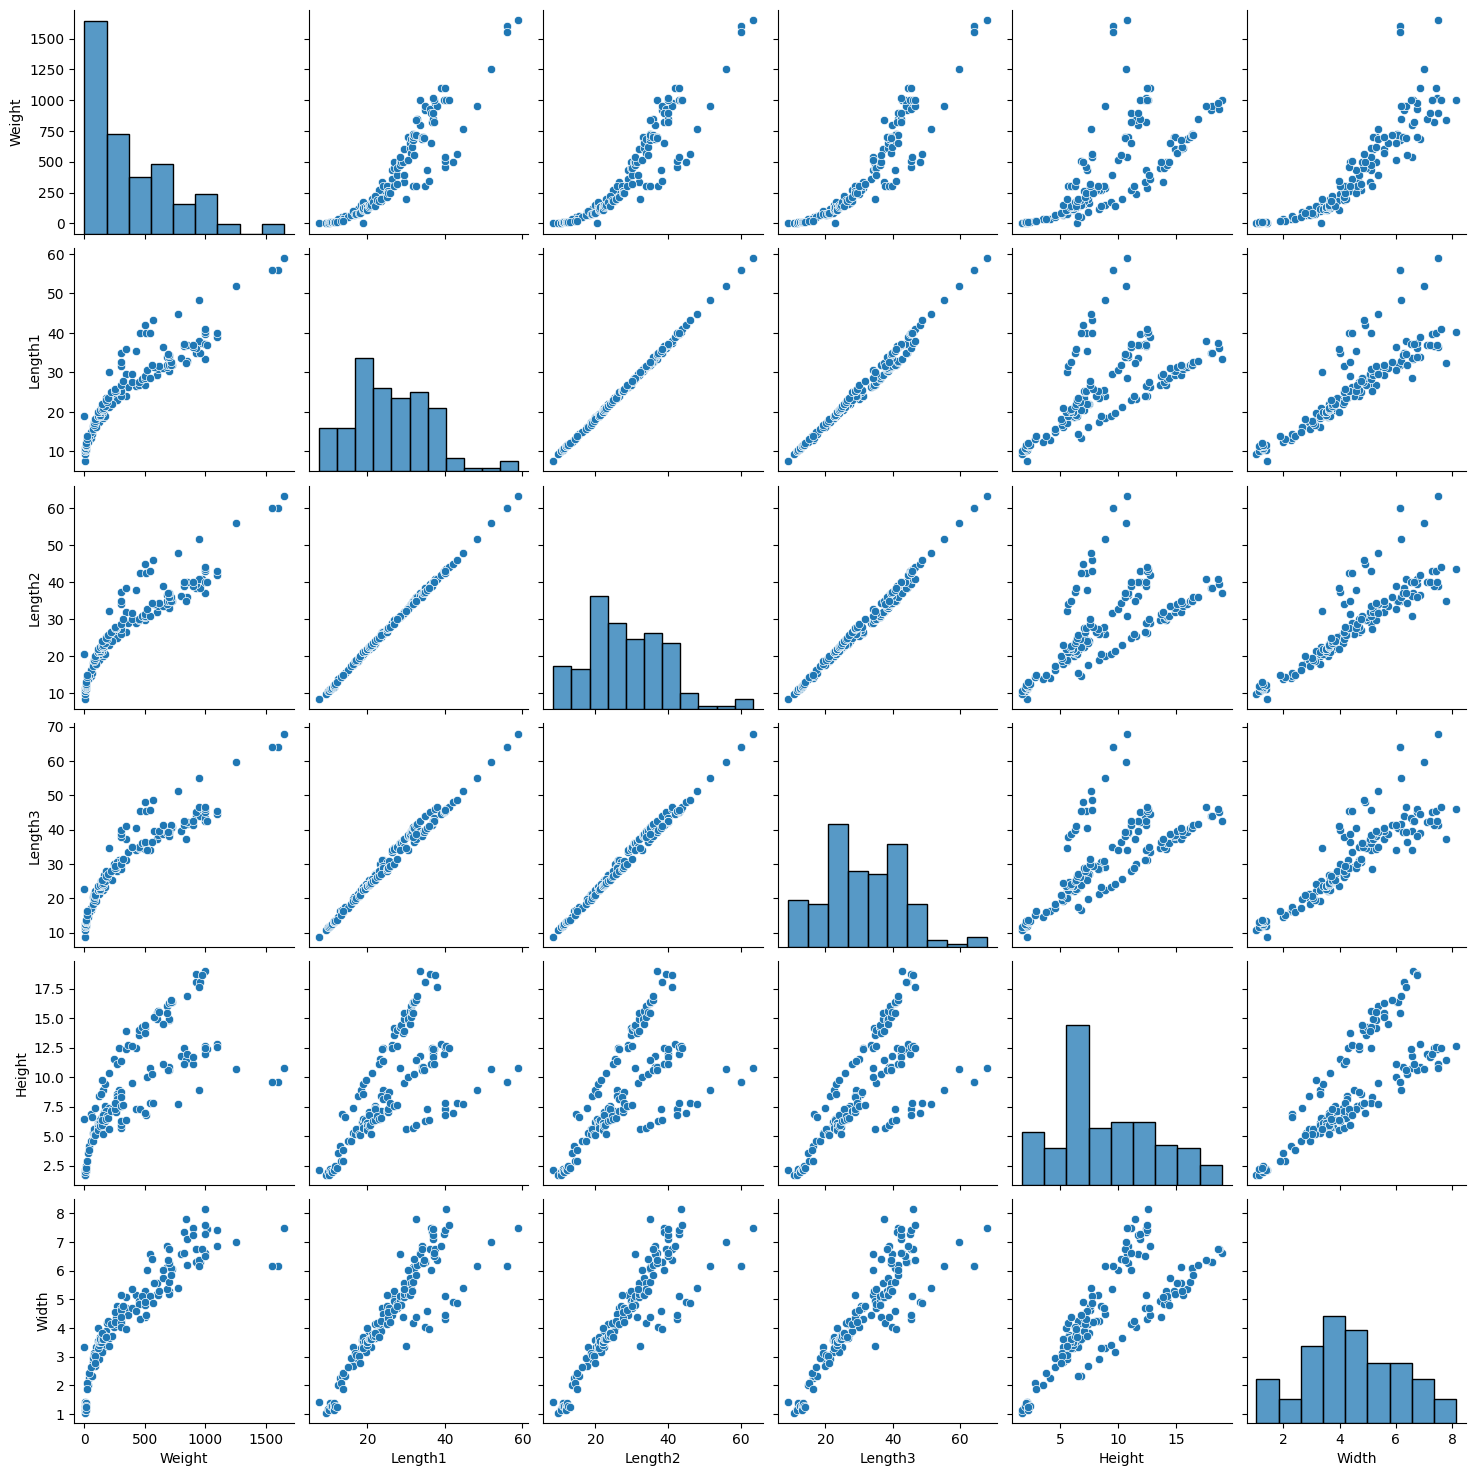

In [ ]:
sns.pairplot(data2)


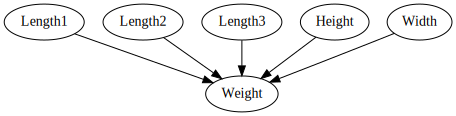

In [ ]:
dag_b = gv.Digraph(comment='fish')

dag_b.node('L', 'Length1')
dag_b.node('M','Length2')
dag_b.node('N', 'Length3')
dag_b.node('H','Height')
dag_b.node('X','Width')
dag_b.node('W','Weight')




dag_b.edges(['LW', 'MW', 'NW', 'HW', 'XW',])

dag_b

Gemini used code below to help me use Gamma, wasn't working before.


In [ ]:
data2_filtered = data2[data2['Weight'] > 0].copy()

First, I created a model that tried to predict the Weight of the Fish using all of the variables I thought may be correlated (no visualization).

In [ ]:
model = bmb.Model("Weight ~ Length1 + Length2 + Length3 + Width + Species", data=data2_filtered)
idata = model.fit(idata_kwargs={'log_likelihood': True})

Then, I created a model that predicts the Weight of the fish using Length1 and Species as independent variables, using a simple linear model.

In [29]:
model2 = bmb.Model("Weight ~ Length1 + Species", data=data2_filtered)
idata2 = model2.fit(idata_kwargs={'log_likelihood': True})

Output()

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Length1', ylabel='Weight'>], dtype=object))

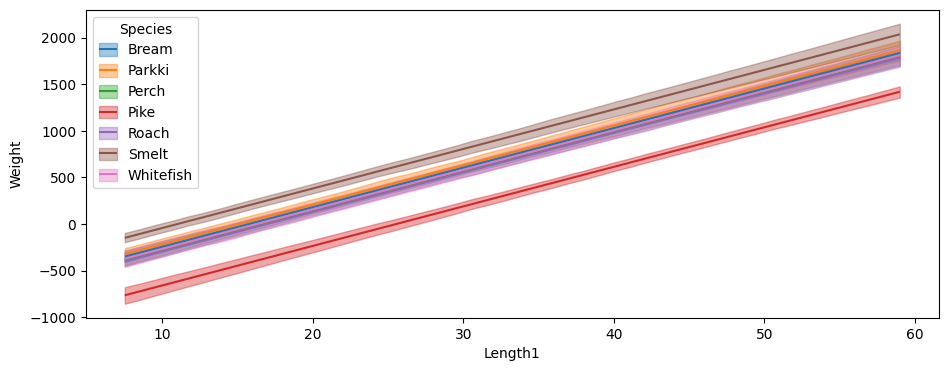

In [ ]:
bmb.interpret.plot_predictions(model2, idata2, ["Length1", "Species"], fig_kwargs={"figsize":(11, 4)})

I noticed that there were negative values for weight, which should never happen. Therefore, I decided to switch from the Linear model to a Gamma distribution, so

This model predicts the Weight of the fish using Length1 and Species as predictors, but I decided to use a Gamma distribution for the likelihood and a log link function. I did this because this is better for a positive, continuous, and skewed dependent variable like Weight.

In [ ]:
model4 = bmb.Model("Weight ~ Length1 + Species", data=data2_filtered, family='gamma', link='log')
idata4 = model4.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Length1', ylabel='Weight'>], dtype=object))

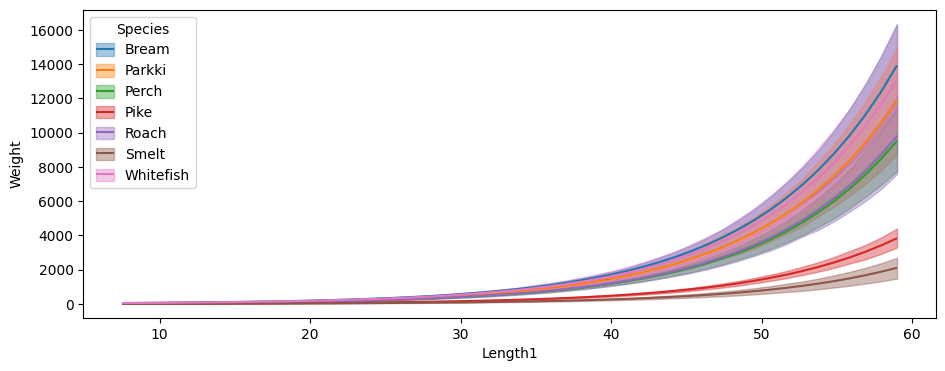

In [ ]:
bmb.interpret.plot_predictions(model4, idata4, ["Length1","Species"], fig_kwargs={"figsize":(11, 4)}, sample_new_groups=True)

In [ ]:
model5 = bmb.Model("Weight ~ Width + Species", data=data2_filtered, family='gamma', link='log')
idata5 = model5.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Width', ylabel='Weight'>], dtype=object))

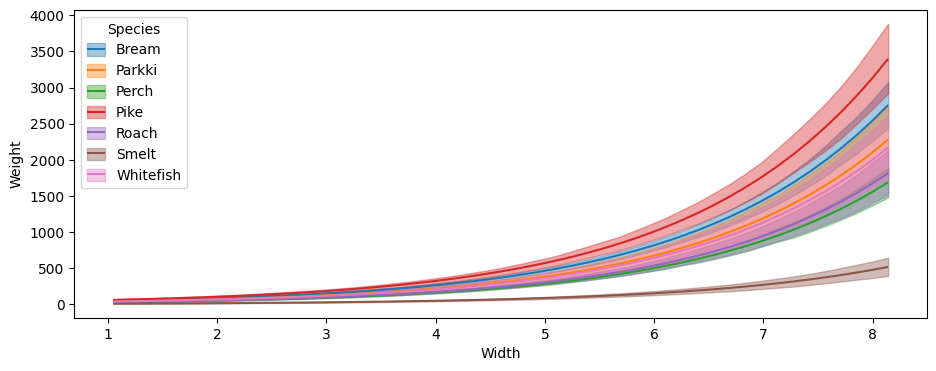

In [ ]:
bmb.interpret.plot_predictions(model5, idata5, ["Width","Species"], fig_kwargs={"figsize":(11, 4)}, sample_new_groups=True)

In [ ]:
model6 = bmb.Model("Weight ~ Height + Species", data=data2_filtered, family='gamma', link='log')
idata6 = model6.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Height', ylabel='Weight'>], dtype=object))

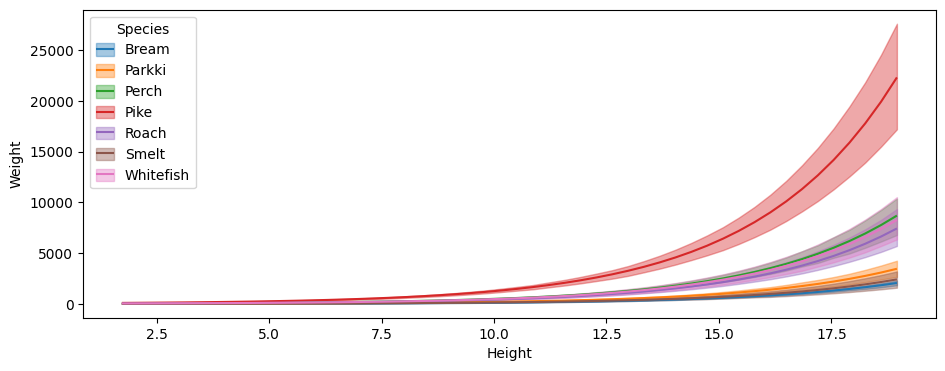

In [ ]:
bmb.interpret.plot_predictions(model6, idata6, ["Height","Species"], fig_kwargs={"figsize":(11, 4)}, sample_new_groups=True)

In [ ]:
model7 = bmb.Model("Weight ~ Length2 + Species", data=data2_filtered, family='gamma', link='log')
idata7 = model7.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Length2', ylabel='Weight'>], dtype=object))

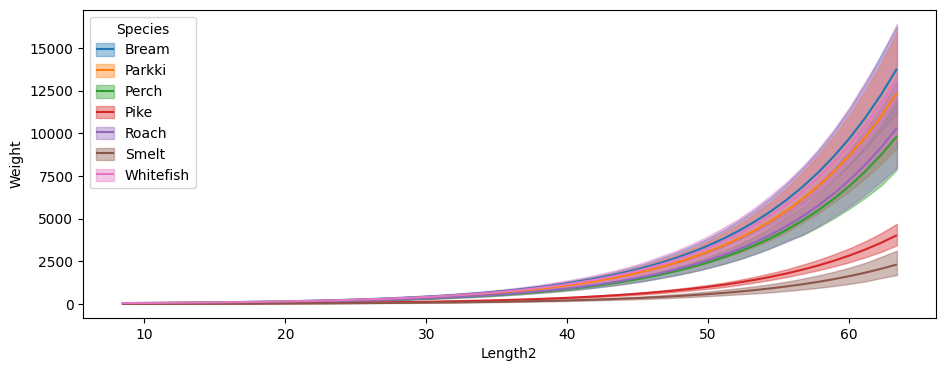

In [ ]:
bmb.interpret.plot_predictions(model7, idata7, ["Length2","Species"], fig_kwargs={"figsize":(11, 4)}, sample_new_groups=True)

In [ ]:
model8 = bmb.Model("Weight ~ Length3 + Species", data=data2_filtered, family='gamma', link='log')
idata8 = model8.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Length3', ylabel='Weight'>], dtype=object))

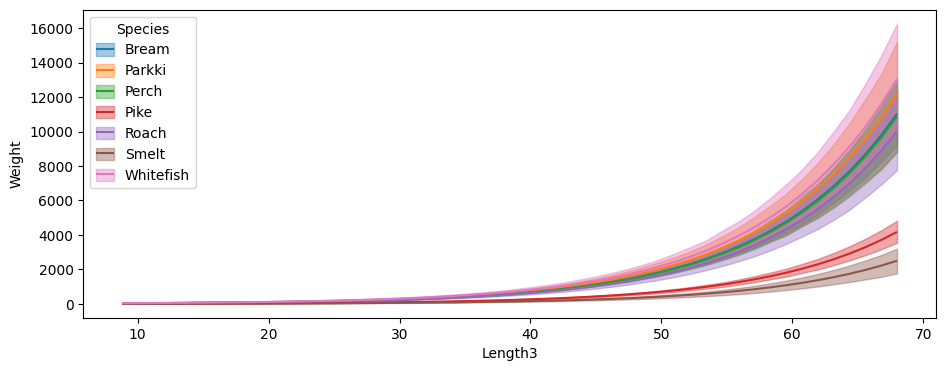

In [ ]:
bmb.interpret.plot_predictions(model8, idata8, ["Length3","Species"], fig_kwargs={"figsize":(11, 4)}, sample_new_groups=True)

In [ ]:
model9 = bmb.Model("Weight ~ Length3 + Length1 + Species", data=data2_filtered, family='gamma', link='log')
idata9 = model9.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Length3', ylabel='Weight'>], dtype=object))

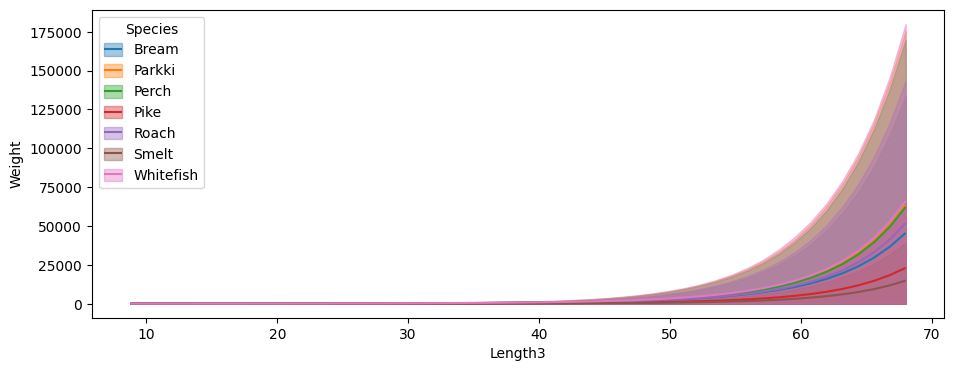

In [25]:
bmb.interpret.plot_predictions(model9, idata9, ["Length3","Species"], fig_kwargs={"figsize":(11, 4)}, sample_new_groups=True)

#Comparison


In [31]:
cmp_df_bmb = az.compare( {"model":idata,"model2":idata2,"model4":idata4,"model5":idata5,"model6":idata6,"model7":idata7,"model8":idata8,"model9":idata9} )
cmp_df_bmb

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimat

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model8,0,-851.239485,12.321856,0.000000,7.044341e-01,24.646841,0.000000,False,log
model9,1,-852.371143,13.451521,1.131657,4.994814e-12,24.939300,0.433824,True,log
model7,2,-853.686900,12.220454,2.447414,6.528761e-12,24.361570,1.974305,False,log
model4,3,-854.151051,12.960072,2.911565,6.525692e-12,24.567918,2.423859,True,log
model5,4,-857.958731,11.489711,6.719245,1.443821e-01,24.053098,9.018905,True,log
model6,5,-869.006640,10.306338,17.767154,1.108196e-01,22.983918,11.424506,False,log
model,6,-950.527842,15.155446,99.288356,6.875902e-12,15.058523,18.333644,False,log
model2,7,-953.866301,11.288509,102.626815,4.036429e-02,13.672002,18.306912,True,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

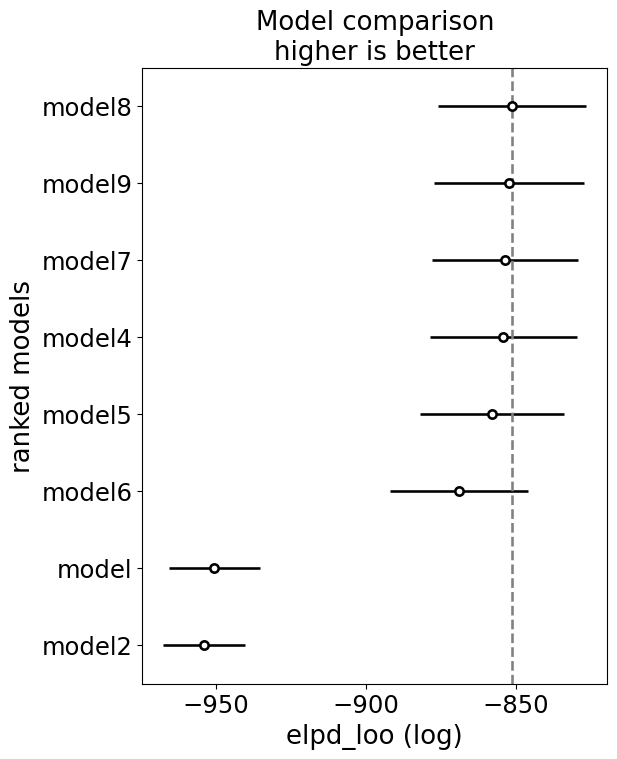

In [32]:
az.plot_compare(cmp_df_bmb)

#Conclusion

Model 9 fits the best, partly because I used a Gamma distribution for this, which is good for predicting a positive, skewed dataset like weight. In addition, I found that Length1 (Vertical) is the best predictor for Weight, followed by Length3 (Total).
